In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')

In [2]:
hate_data = pd.read_csv("~/Downloads/Hate-2001-2020.csv")
hate_data.head()

,RecordId,ClosedYear,MonthOccurrence,County,NCIC,TotalNumberOfVictims,TotalNumberOfIndividualVictims,SuspectsRaceAsAGroup,TotalNumberOfSuspects,MostSeriousUcr,...,MostSeriousBiasType,MostSeriousVictimType,WeaponType,Offensive_Act,IsMultipleBias,TotalNumberOfIndividualVictimsAdult,TotalNumberOfIndividualVictimsJuvenile,TotalNumberOfSuspectsAdult,TotalNumberOfSuspectsJuvenile,SuspectsEthnicityAsAGroup
0,CA01-0000000001,2001,2,1,100,1,1,White,2,Simple Assault,...,Race/Ethnicity/Ancestry,Person,"Personal weapons (hands, feet, teeth, etc.)",Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
1,CA01-0000000005,2001,2,1,100,2,2,White,1,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Graffiti,NaN,NaN,NaN,NaN,NaN,NaN
2,CA01-0000000003,2001,5,1,100,1,1,White,4,Destruction/Damage/Vandalism,...,Race/Ethnicity/Ancestry,Person,NaN,Daubing of swastika,NaN,NaN,NaN,NaN,NaN,NaN
3,CA01-0000000002,2001,9,1,100,1,1,White,1,Intimidation,...,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN
4,CA01-0000000004,2001,9,1,100,2,2,White,1,Intimidation,...,Race/Ethnicity/Ancestry,Person,NaN,Verbal slurs,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
hate_data.dtypes

RecordId                                   object
ClosedYear                                  int64
MonthOccurrence                             int64
County                                      int64
NCIC                                       object
TotalNumberOfVictims                        int64
TotalNumberOfIndividualVictims              int64
SuspectsRaceAsAGroup                       object
TotalNumberOfSuspects                       int64
MostSeriousUcr                             object
MostSeriousUcrType                         object
MostSeriousLocation                        object
MostSeriousBias                            object
MostSeriousBiasType                        object
MostSeriousVictimType                      object
WeaponType                                 object
Offensive_Act                              object
IsMultipleBias                             object
TotalNumberOfIndividualVictimsAdult       float64
TotalNumberOfIndividualVictimsJuvenile    float64


In [4]:
hate_data['ClosedYear'] = hate_data['ClosedYear'].apply(str)
hate_data['MonthOccurrence'] = hate_data['MonthOccurrence'].apply(str)
hate_data.dtypes

RecordId                                   object
ClosedYear                                 object
MonthOccurrence                            object
County                                      int64
NCIC                                       object
TotalNumberOfVictims                        int64
TotalNumberOfIndividualVictims              int64
SuspectsRaceAsAGroup                       object
TotalNumberOfSuspects                       int64
MostSeriousUcr                             object
MostSeriousUcrType                         object
MostSeriousLocation                        object
MostSeriousBias                            object
MostSeriousBiasType                        object
MostSeriousVictimType                      object
WeaponType                                 object
Offensive_Act                              object
IsMultipleBias                             object
TotalNumberOfIndividualVictimsAdult       float64
TotalNumberOfIndividualVictimsJuvenile    float64


In [5]:
hate_by_year = pd.DataFrame(hate_data.groupby('ClosedYear').size())
hate_by_year = hate_by_year.reset_index()
hate_by_year = hate_by_year.set_axis(['Year', 'Total_Hate_Crimes'], axis=1, inplace=False)
hate_by_year.head()

,Year,Total_Hate_Crimes
0,2001,2261
1,2002,1659
2,2003,1491
3,2004,1409
4,2005,1397


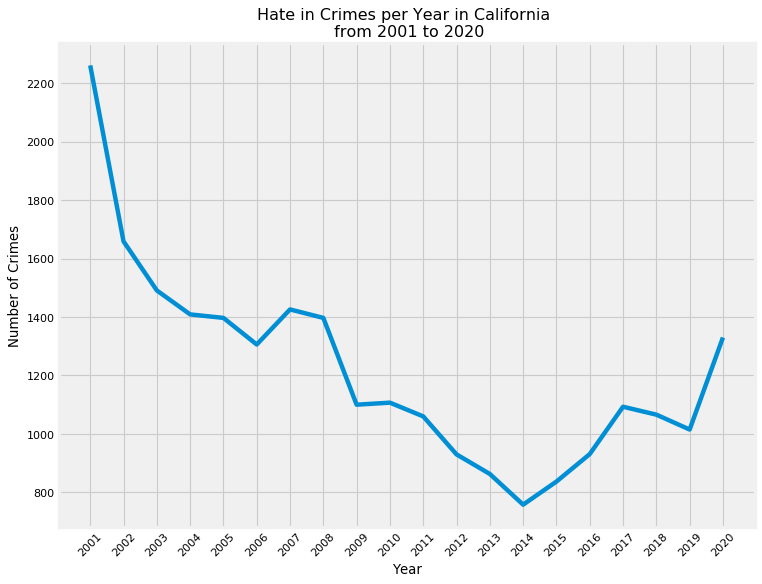

In [6]:
figure(figsize=(10, 8), dpi=80)
plt.plot(hate_by_year['Year'], hate_by_year['Total_Hate_Crimes'])
plt.title('Hate in Crimes per Year in California \n from 2001 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation = 45)
plt.show()

In [7]:
hate_by_month = pd.DataFrame(hate_data.groupby('MonthOccurrence').size())#.iloc[:,0]
hate_by_month = hate_by_month.reset_index()
hate_by_month = hate_by_month.set_axis(['Month', 'Total_Hate_Crimes'], axis=1, inplace=False)
hate_by_month['Month'] = ["01", "10", "11", "12", "02", "03", "04", "05", "06", "07", "08", "09"]
hate_by_month = hate_by_month.sort_values(by=['Month'], ascending=True)
hate_by_month.head()

,Month,Total_Hate_Crimes
0,01,1875
4,02,1794
5,03,2153
6,04,2110
7,05,2210


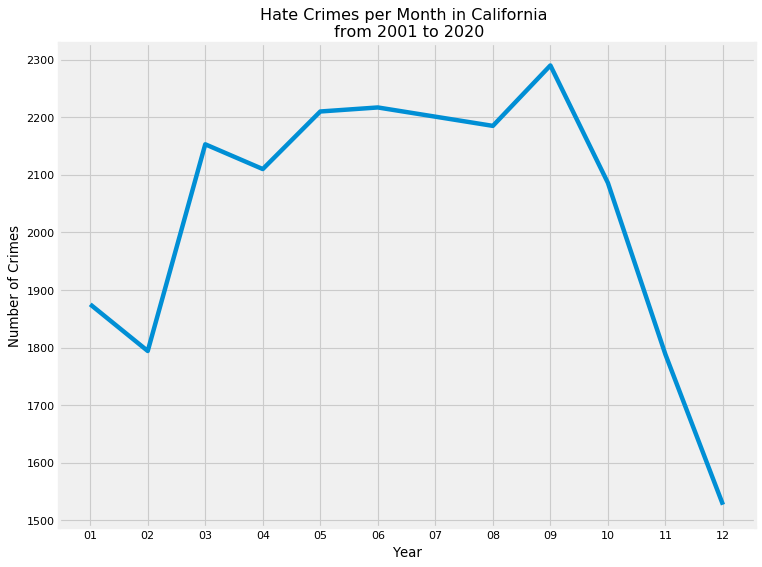

In [8]:
figure(figsize=(10, 8), dpi=80)
plt.plot(hate_by_month['Month'], hate_by_month['Total_Hate_Crimes'])
plt.title('Hate Crimes per Month in California \n from 2001 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

In [9]:
hate_by_offensive_act = pd.DataFrame(hate_data.groupby('Offensive_Act').size())
hate_by_offensive_act = hate_by_offensive_act.reset_index()
hate_by_offensive_act = hate_by_offensive_act.set_axis(['Offensive_Act', 'Count'], axis=1, inplace=False)
hate_by_offensive_act.loc[len(hate_by_offensive_act)] = ['Other', 22+22+30+13+29+2889+227+63]
hate_by_offensive_act = hate_by_offensive_act.drop([1, 2, 5, 6, 8, 9, 10, 12])
hate_by_offensive_act.iloc[:,0] = ['Annoying \n telephone \n calls/fax',
                                  'Damage \n to \n vehicle', 
                                  'Daubing \n of \n swastika',
                                  'Graffiti',
                                  'Threatening \n letters/ \n flyers/ \n email',
                                  'Verbal \n slurs', 'Other']
hate_by_offensive_act = hate_by_offensive_act.sort_values(by="Count")
hate_by_offensive_act = hate_by_offensive_act.reset_index(drop=True)
hate_by_offensive_act

,Offensive_Act,Count
0,Threatening \n letters/ \n flyers/ \n email,978
1,Annoying \n telephone \n calls/fax,980
2,Damage \n to \n vehicle,1242
3,Daubing \n of \n swastika,1568
4,Other,3295
5,Graffiti,4968
6,Verbal \n slurs,11043


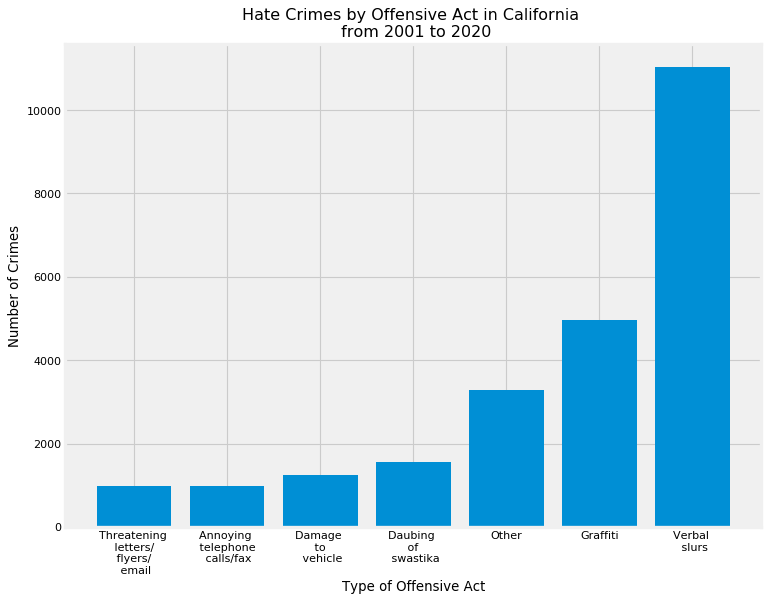

In [10]:
figure(figsize=(10, 8), dpi=80)
plt.bar(hate_by_offensive_act['Offensive_Act'], hate_by_offensive_act['Count'])
plt.title('Hate Crimes by Offensive Act in California \n from 2001 to 2020')
plt.xlabel('Type of Offensive Act')
plt.ylabel('Number of Crimes')
plt.show()

In [11]:
hate_by_type = pd.DataFrame(hate_data.groupby('MostSeriousBiasType').size())
hate_by_type = hate_by_type.reset_index()
hate_by_type = hate_by_type.set_axis(['Type', 'Count'], axis=1, inplace=False)
hate_by_type.loc[len(hate_by_type)] = ['Gender/Disability', 84+58+397]
hate_by_type = hate_by_type.drop([0, 1, 2]).reset_index(drop=True)
hate_by_type

,Type,Count
0,Race/Ethnicity/Ancestry,14696
1,Religion,4037
2,Sexual Orientation,5164
3,Gender/Disability,539


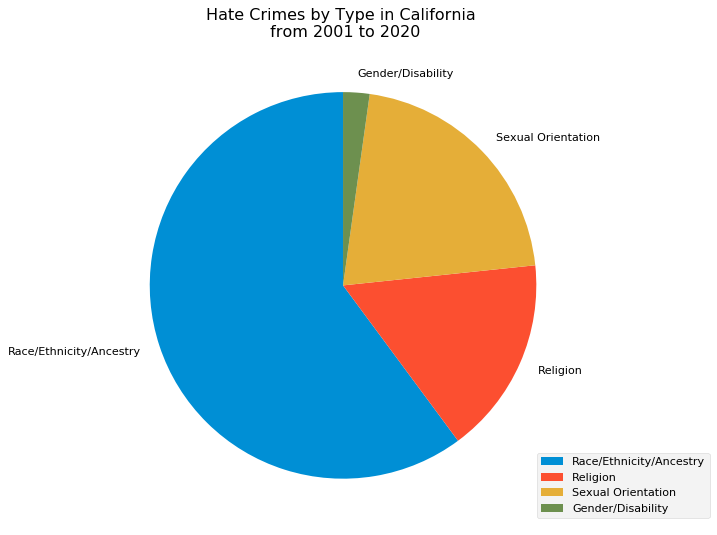

In [12]:
figure(figsize=(10, 8), dpi=80)
plt.pie(hate_by_type['Count'], labels=hate_by_type['Type'], startangle=90)
plt.legend(bbox_to_anchor=(0.75,0.25), loc="upper left",
          bbox_transform=plt.gcf().transFigure)
plt.title('Hate Crimes by Type in California \n from 2001 to 2020')
plt.show()

In [13]:
hate_by_year_type = pd.DataFrame(hate_data.groupby(['ClosedYear', 'MostSeriousBiasType']).size())#.iloc[:,0]
hate_by_year_type = hate_by_year_type.reset_index()
hate_by_year_type = hate_by_year_type.set_axis(['Year', 'Type', 'Count'], axis=1, inplace=False)
hate_by_year_type.head()

,Year,Type,Count
0,2001,Disability,4
1,2001,Gender,1
2,2001,Gender Nonconforming,14
3,2001,Race/Ethnicity/Ancestry,1526
4,2001,Religion,296


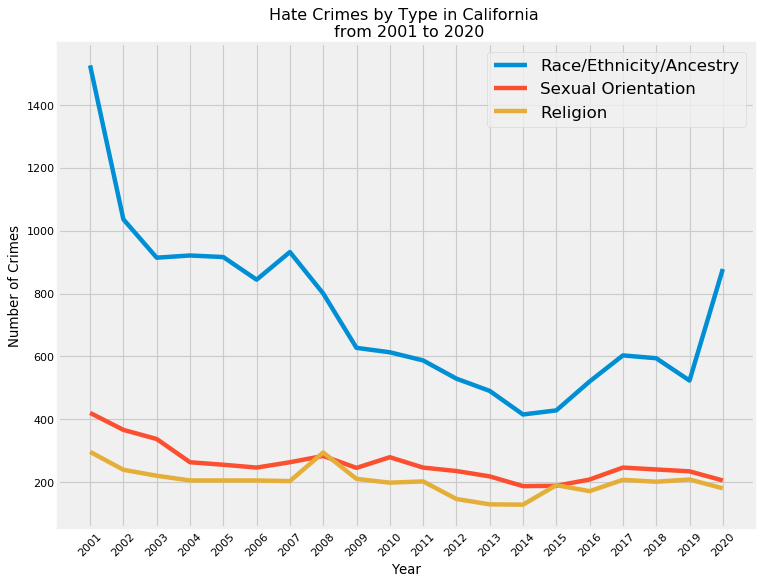

In [14]:
figure(figsize=(10, 8), dpi=80)
plt.plot(hate_by_year_type[hate_by_year_type['Type'] == 'Race/Ethnicity/Ancestry']['Year'], 
         hate_by_year_type[hate_by_year_type['Type'] == 'Race/Ethnicity/Ancestry']['Count'], 
         label='Race/Ethnicity/Ancestry')
plt.plot(hate_by_year_type[hate_by_year_type['Type'] == 'Sexual Orientation']['Year'], 
         hate_by_year_type[hate_by_year_type['Type'] == 'Sexual Orientation']['Count'], label='Sexual Orientation')
plt.plot(hate_by_year_type[hate_by_year_type['Type'] == 'Religion']['Year'], 
         hate_by_year_type[hate_by_year_type['Type'] == 'Religion']['Count'], label='Religion')
plt.title('Hate Crimes by Type in California \n from 2001 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation = 45)
plt.legend(prop={'size': 15})
plt.show()

In [15]:
hate_by_race = pd.DataFrame(hate_data[hate_data['MostSeriousBiasType'] == 'Race/Ethnicity/Ancestry'].groupby(['MostSeriousBias']).size())#.iloc[:,0]
hate_by_race = hate_by_race.reset_index()
hate_by_race = hate_by_race.set_axis(['Race', 'Count'], axis=1, inplace=False)
hate_by_race

,Race,Count
0,Anti-American Indian/Alaska Native,52
1,Anti-Arab,355
2,Anti-Asian,895
3,Anti-Black or African American,7508
4,Anti-Citizenship Status,50
5,Anti-Hispanic or Latino,2414
6,Anti-Multiple Races (Group),697
7,Anti-Native Hawaiian or Other Pacific Islander,12
8,Anti-Other Race/Ethnicity/Ancestry,1559
9,Anti-White,1154


In [16]:
hate_by_year_race = pd.DataFrame(hate_data[hate_data['MostSeriousBiasType'] == 'Race/Ethnicity/Ancestry'].groupby(['ClosedYear', 'MostSeriousBias']).size())#.iloc[:,0]
hate_by_year_race = hate_by_year_race.reset_index()
hate_by_year_race = hate_by_year_race.set_axis(['Year', 'Race', 'Count'], axis=1, inplace=False)
hate_by_year_race.head()

,Year,Race,Count
0,2001,Anti-American Indian/Alaska Native,4
1,2001,Anti-Asian,93
2,2001,Anti-Black or African American,596
3,2001,Anti-Hispanic or Latino,206
4,2001,Anti-Multiple Races (Group),71


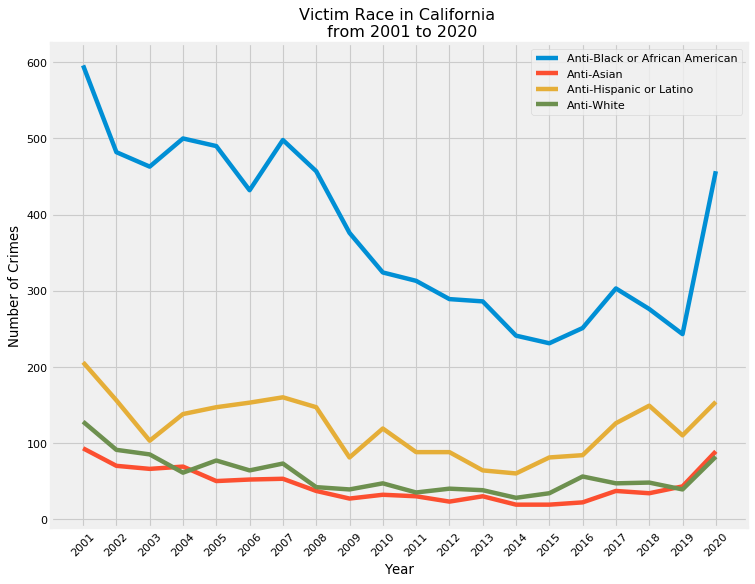

In [17]:
figure(figsize=(10, 8), dpi=80)
plt.plot(hate_by_year_race[hate_by_year_race['Race'] == 'Anti-Black or African American']['Year'], 
         hate_by_year_race[hate_by_year_race['Race'] == 'Anti-Black or African American']['Count'], label='Anti-Black or African American')
plt.plot(hate_by_year_race[hate_by_year_race['Race'] == 'Anti-Asian']['Year'], 
         hate_by_year_race[hate_by_year_race['Race'] == 'Anti-Asian']['Count'], label='Anti-Asian')
plt.plot(hate_by_year_race[hate_by_year_race['Race'] == 'Anti-Hispanic or Latino']['Year'], 
         hate_by_year_race[hate_by_year_race['Race'] == 'Anti-Hispanic or Latino']['Count'], label='Anti-Hispanic or Latino')
plt.plot(hate_by_year_race[hate_by_year_race['Race'] == 'Anti-White']['Year'], 
         hate_by_year_race[hate_by_year_race['Race'] == 'Anti-White']['Count'], label='Anti-White')
plt.title('Victim Race in California \n from 2001 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [18]:
hate_by_sex = pd.DataFrame(hate_data[hate_data['MostSeriousBiasType'] == 'Sexual Orientation'].groupby(['MostSeriousBias']).size())#.iloc[:,0]
hate_by_sex = hate_by_sex.reset_index()
hate_by_sex = hate_by_sex.set_axis(['Sexual Orientation', 'Count'], axis=1, inplace=False)
hate_by_sex

,Sexual Orientation,Count
0,Anti-Bisexual,48
1,Anti-Gay (Male),3198
2,Anti-Heterosexual,34
3,Anti-Lesbian,583
4,Anti-Lesbian/Gay/Bisexual or Transgender (Mixe...,1301


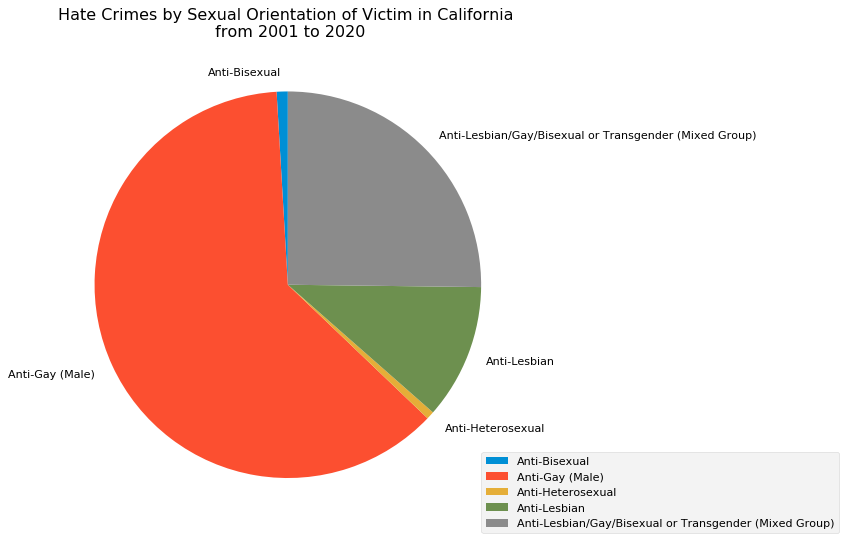

In [19]:
figure(figsize=(10, 8), dpi=80)
plt.pie(hate_by_sex['Count'], labels=hate_by_sex['Sexual Orientation'], startangle=90)
plt.legend(bbox_to_anchor=(0.75,0.25), loc="upper left",
          bbox_transform=plt.gcf().transFigure)
plt.title('Hate Crimes by Sexual Orientation of Victim in California \n from 2001 to 2020')
plt.show()

In [20]:
hate_by_religion = pd.DataFrame(hate_data[hate_data['MostSeriousBiasType'] == 'Religion'].groupby(['MostSeriousBias']).size())#.iloc[:,0]
hate_by_religion = hate_by_religion.reset_index()
hate_by_religion = hate_by_religion.set_axis(['Religion', 'Count'], axis=1, inplace=False)
hate_by_religion = hate_by_religion.sort_values(by='Count', ascending=False).reset_index(drop=True)
hate_by_religion

,Religion,Count
0,Anti-Jewish,2563
1,Anti-Islamic (Muslim),487
2,Anti-Other Religion,474
3,Anti-Catholic,189
4,Anti-Multiple Religions (Group),131
5,Anti-Protestant,96
6,Anti-Other Christian,37
7,Anti-Mormon,13
8,Anti-Sikh,12
9,Anti-Hindu,10


In [21]:
hate_by_year_religion = pd.DataFrame(hate_data[hate_data['MostSeriousBiasType'] == 'Religion'].groupby(['ClosedYear', 'MostSeriousBias']).size())
hate_by_year_religion = hate_by_year_religion.reset_index()
hate_by_year_religion = hate_by_year_religion.set_axis(['Year', 'Religion', 'Count'], axis=1, inplace=False)
hate_by_year_religion.head()

,Year,Religion,Count
0,2001,Anti-Atheism/Agnosticism,1
1,2001,Anti-Catholic,9
2,2001,Anti-Islamic (Muslim),73
3,2001,Anti-Jewish,176
4,2001,Anti-Multiple Religions (Group),14


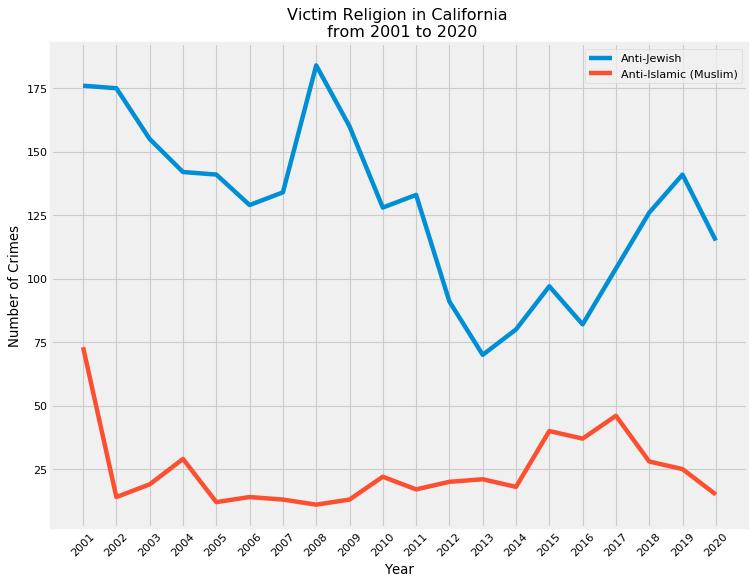

In [22]:
figure(figsize=(10, 8), dpi=80)
plt.plot(hate_by_year_religion[hate_by_year_religion['Religion'] == 'Anti-Jewish']['Year'], 
         hate_by_year_religion[hate_by_year_religion['Religion'] == 'Anti-Jewish']['Count'], label='Anti-Jewish')
plt.plot(hate_by_year_religion[hate_by_year_religion['Religion'] == 'Anti-Islamic (Muslim)']['Year'], 
         hate_by_year_religion[hate_by_year_religion['Religion'] == 'Anti-Islamic (Muslim)']['Count'], label='Anti-Islamic (Muslim)')
plt.title('Victim Religion in California \n from 2001 to 2020')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [23]:
pop_2000s = pd.read_csv("~/Desktop/co-est00int-01-06.csv").iloc[4:62,[0, 3, 4, 5, 6, 7, 8, 9, 10, 11]].reset_index(drop=True)
pop_2000s = pop_2000s.set_axis(['County', '2001', '2002', '2003', '2004',
                   '2005', '2006', '2007', '2008', '2009'], axis=1, inplace=False)
pop_2000s.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,.Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539"
1,.Alpine County,"1,196","1,237","1,233","1,263","1,219","1,276","1,274","1,202","1,197"
2,.Amador County,"35,697","36,561","36,994","37,400","38,040","38,353","38,756","38,248","38,238"
3,.Butte County,"206,193","209,120","211,481","213,065","214,752","216,824","217,469","219,034","219,777"
4,.Calaveras County,"41,304","42,380","43,755","44,530","45,295","46,045","46,268","46,265","45,900"


In [24]:
for i in range(len(pop_2000s)):
    county_name = pop_2000s.iloc[i, 0]
    pop_2000s.iloc[i, 0] = county_name[1:]

pop_2000s.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539"
1,Alpine County,"1,196","1,237","1,233","1,263","1,219","1,276","1,274","1,202","1,197"
2,Amador County,"35,697","36,561","36,994","37,400","38,040","38,353","38,756","38,248","38,238"
3,Butte County,"206,193","209,120","211,481","213,065","214,752","216,824","217,469","219,034","219,777"
4,Calaveras County,"41,304","42,380","43,755","44,530","45,295","46,045","46,268","46,265","45,900"


In [25]:
pop_2010s = pd.read_csv("~/Desktop/co-est2019-annres-06.csv").iloc[4:62,[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].reset_index(drop=True)
pop_2010s = pop_2010s.set_axis(['County', '2010', '2011', '2012', '2013', '2014',
                                '2015', '2016', '2017', '2018', '2019'], axis=1, inplace=False)
pop_2010s.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,".Alameda County, California","1,512,986","1,530,915","1,553,764","1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329"
1,".Alpine County, California","1,161","1,093","1,110","1,128","1,080","1,077","1,047","1,111","1,089","1,129"
2,".Amador County, California","37,886","37,543","37,104","36,620","36,726","37,031","37,429","38,529","39,405","39,752"
3,".Butte County, California","219,949","219,975","220,869","221,641","223,516","224,631","226,231","228,696","230,339","219,186"
4,".Calaveras County, California","45,468","45,160","44,815","44,655","44,671","44,965","45,322","45,681","45,698","45,905"


In [26]:
for i in range(len(pop_2010s)):
    county_name = pop_2010s.iloc[i, 0]
    county_name = county_name[1:]
    county_name = county_name[:-12]
    pop_2010s.iloc[i, 0] = county_name

pop_2010s.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alameda County,"1,512,986","1,530,915","1,553,764","1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329"
1,Alpine County,"1,161","1,093","1,110","1,128","1,080","1,077","1,047","1,111","1,089","1,129"
2,Amador County,"37,886","37,543","37,104","36,620","36,726","37,031","37,429","38,529","39,405","39,752"
3,Butte County,"219,949","219,975","220,869","221,641","223,516","224,631","226,231","228,696","230,339","219,186"
4,Calaveras County,"45,468","45,160","44,815","44,655","44,671","44,965","45,322","45,681","45,698","45,905"


In [27]:
pop = pd.merge(pop_2000s, pop_2010s, on='County')
pop.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539","1,512,986","1,530,915","1,553,764","1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329"
1,Alpine County,"1,196","1,237","1,233","1,263","1,219","1,276","1,274","1,202","1,197","1,161","1,093","1,110","1,128","1,080","1,077","1,047","1,111","1,089","1,129"
2,Amador County,"35,697","36,561","36,994","37,400","38,040","38,353","38,756","38,248","38,238","37,886","37,543","37,104","36,620","36,726","37,031","37,429","38,529","39,405","39,752"
3,Butte County,"206,193","209,120","211,481","213,065","214,752","216,824","217,469","219,034","219,777","219,949","219,975","220,869","221,641","223,516","224,631","226,231","228,696","230,339","219,186"
4,Calaveras County,"41,304","42,380","43,755","44,530","45,295","46,045","46,268","46,265","45,900","45,468","45,160","44,815","44,655","44,671","44,965","45,322","45,681","45,698","45,905"


In [28]:
county_metadata = pd.read_csv("~/Desktop/NCIC_Code_Jurisdiction_List_06292021.csv")
county_metadata.head()

,CntyCode,County,Code,Agency,Start,End
0,1,Alameda County,0100,Alameda Co. Sheriff's Department,NaN,NaN
1,1,Alameda County,0101,Alameda,NaN,NaN
2,1,Alameda County,0102,Albany,NaN,NaN
3,1,Alameda County,0103,Berkeley,NaN,NaN
4,1,Alameda County,0104,Emeryville,NaN,NaN


In [29]:
pop['County_Number'] = list(set(county_metadata['CntyCode']))
pop.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,County_Number
0,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,530,915","1,553,764","1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1
1,Alpine County,"1,196","1,237","1,233","1,263","1,219","1,276","1,274","1,202","1,197",...,"1,093","1,110","1,128","1,080","1,077","1,047","1,111","1,089","1,129",2
2,Amador County,"35,697","36,561","36,994","37,400","38,040","38,353","38,756","38,248","38,238",...,"37,543","37,104","36,620","36,726","37,031","37,429","38,529","39,405","39,752",3
3,Butte County,"206,193","209,120","211,481","213,065","214,752","216,824","217,469","219,034","219,777",...,"219,975","220,869","221,641","223,516","224,631","226,231","228,696","230,339","219,186",4
4,Calaveras County,"41,304","42,380","43,755","44,530","45,295","46,045","46,268","46,265","45,900",...,"45,160","44,815","44,655","44,671","44,965","45,322","45,681","45,698","45,905",5


In [30]:
hate_by_county_year = pd.DataFrame(hate_data.groupby(['ClosedYear', 'County']).size()).reset_index()
hate_by_county_year = hate_by_county_year.set_axis(['Year', 'County_Number', 'Count'], axis=1, inplace=False)
hate_by_county_year.head()

,Year,County_Number,Count
0,2001,1,63
1,2001,4,1
2,2001,7,58
3,2001,8,1
4,2001,10,29


In [31]:
years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
        '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
county_numbers = list(range(1, 59))

In [32]:
import itertools
from itertools import product

In [33]:
len(list(product(years, county_numbers)))
year_numbers_combo = list(product(years, county_numbers))

In [34]:
for i in range(len(year_numbers_combo)):
    year = year_numbers_combo[i][0]
    number = year_numbers_combo[i][1]
    df_num_row = hate_by_county_year.loc[(hate_by_county_year['Year'] == year) & (hate_by_county_year['County_Number'] == number)].shape[0]
    
    if df_num_row != 1:
        hate_by_county_year.loc[len(hate_by_county_year)] = [year, number, 0]

hate_by_county_year.tail()

,Year,County_Number,Count
1155,2020,28,0
1156,2020,32,0
1157,2020,46,0
1158,2020,47,0
1159,2020,53,0


In [35]:
hate_by_county_year.shape

(1160, 3)

In [36]:
hate_by_county_year_pop = pd.merge(pop, hate_by_county_year, on='County_Number')
hate_by_county_year_pop.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,County_Number,Year,Count
0,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2001,63
1,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2002,56
2,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2003,42
3,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2004,38
4,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2005,39


In [37]:
hate_by_county_year_pop.shape

(1160, 23)

In [38]:
hate_2001 = hate_by_county_year_pop[hate_by_county_year_pop['Year'] == '2001'].iloc[:,[0, 1, 20, 22]]
hate_2001.head()

,County,2001,County_Number,Count
0,Alameda County,"1,469,484",1,63
21,Alpine County,"1,196",2,0
53,Amador County,"35,697",3,0
60,Butte County,"206,193",4,1
91,Calaveras County,"41,304",5,0


In [39]:
hate_2001.shape

(58, 4)

In [40]:
for i in range(len(hate_2001)):
    pop_2001 = hate_2001.iloc[i, 1]
    hate_2001.iloc[i, 1] = int(pop_2001.replace(',', ''))

hate_2001.head()

,County,2001,County_Number,Count
0,Alameda County,1469484,1,63
21,Alpine County,1196,2,0
53,Amador County,35697,3,0
60,Butte County,206193,4,1
91,Calaveras County,41304,5,0


In [41]:
hate_2001.dtypes

County           object
2001              int64
County_Number     int64
Count             int64
dtype: object

In [42]:
hate_2001['Prop_2001'] = hate_2001['Count']/hate_2001['2001'] * 1000000
hate_2001.head()

,County,2001,County_Number,Count,Prop_2001
0,Alameda County,1469484,1,63,42.872192
21,Alpine County,1196,2,0,0.000000
53,Amador County,35697,3,0,0.000000
60,Butte County,206193,4,1,4.849825
91,Calaveras County,41304,5,0,0.000000


In [137]:
map_data = gpd.read_file("CA_Counties/CA_Counties_TIGER2016.shx")
map_data = map_data.sort_values(by=['NAMELSAD'], ascending=True)
map_data = map_data.reset_index(drop=True)
map_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,01675839,06001,Alameda,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346..."
1,06,003,01675840,06003,Alpine,Alpine County,06,H1,G4020,None,None,None,A,1912292633,12557304,+38.6217831,-119.7983522,"POLYGON ((-13366503.508 4678946.015, -13366492..."
2,06,005,01675841,06005,Amador,Amador County,06,H1,G4020,None,None,None,A,1539933576,29470568,+38.4435501,-120.6538563,"POLYGON ((-13472697.863 4647652.232, -13472697..."
3,06,007,01675842,06007,Butte,Butte County,06,H1,G4020,None,17020,None,A,4238423343,105325812,+39.6659588,-121.6019188,"POLYGON ((-13565004.793 4798394.124, -13564991..."
4,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."


In [138]:
map_data.rename({'NAMELSAD': 'County'}, axis=1, inplace=True)
map_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,01675839,06001,Alameda,Alameda County,06,H1,G4020,488,41860,36084,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346..."
1,06,003,01675840,06003,Alpine,Alpine County,06,H1,G4020,None,None,None,A,1912292633,12557304,+38.6217831,-119.7983522,"POLYGON ((-13366503.508 4678946.015, -13366492..."
2,06,005,01675841,06005,Amador,Amador County,06,H1,G4020,None,None,None,A,1539933576,29470568,+38.4435501,-120.6538563,"POLYGON ((-13472697.863 4647652.232, -13472697..."
3,06,007,01675842,06007,Butte,Butte County,06,H1,G4020,None,17020,None,A,4238423343,105325812,+39.6659588,-121.6019188,"POLYGON ((-13565004.793 4798394.124, -13564991..."
4,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."


In [102]:
map_data = pd.merge(map_data, hate_2001, how='inner', on = 'County')
map_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,2001,County_Number,Count,Prop_2001
0,06,001,01675839,06001,Alameda,Alameda County,06,H1,G4020,488,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",1469484,1,63,42.872192
1,06,003,01675840,06003,Alpine,Alpine County,06,H1,G4020,None,...,A,1912292633,12557304,+38.6217831,-119.7983522,"POLYGON ((-13366503.508 4678946.015, -13366492...",1196,2,0,0.000000
2,06,005,01675841,06005,Amador,Amador County,06,H1,G4020,None,...,A,1539933576,29470568,+38.4435501,-120.6538563,"POLYGON ((-13472697.863 4647652.232, -13472697...",35697,3,0,0.000000
3,06,007,01675842,06007,Butte,Butte County,06,H1,G4020,None,...,A,4238423343,105325812,+39.6659588,-121.6019188,"POLYGON ((-13565004.793 4798394.124, -13564991...",206193,4,1,4.849825
4,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534...",41304,5,0,0.000000


(-13914886.987877833,
 -12647417.311524622,
 3766456.955722065,
 5228877.504468495)

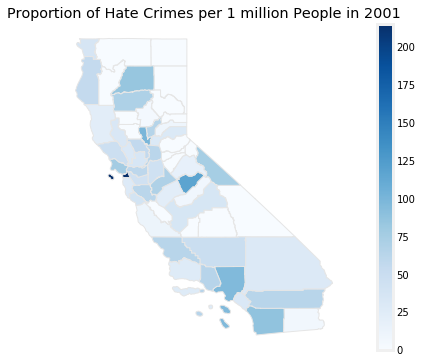

In [103]:
fig, ax = plt.subplots(1, figsize=(10,6))
map_data.plot(column='Prop_2001', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title('Proportion of Hate Crimes per 1 million People in 2001')
ax.axis('off')

In [134]:
hate_2016 = hate_by_county_year_pop[hate_by_county_year_pop['Year'] == '2016'].iloc[:,[0, 16, 20, 22]]
hate_2016.head()

,County,2016,County_Number,Count
15,Alameda County,"1,650,950",1,59
35,Alpine County,"1,047",2,0
51,Amador County,"37,429",3,1
75,Butte County,"226,231",4,5
97,Calaveras County,"45,322",5,0


In [135]:
for i in range(len(hate_2016)):
    pop_2016 = hate_2016.iloc[i, 1]
    hate_2016.iloc[i, 1] = int(pop_2016.replace(',', ''))

hate_2016.head()

,County,2016,County_Number,Count
15,Alameda County,1650950,1,59
35,Alpine County,1047,2,0
51,Amador County,37429,3,1
75,Butte County,226231,4,5
97,Calaveras County,45322,5,0


In [136]:
hate_2016['Prop_2016'] = hate_2016['Count']/hate_2016['2016'] * 1000000
hate_2016.head()

,County,2016,County_Number,Count,Prop_2016
15,Alameda County,1650950,1,59,35.737000
35,Alpine County,1047,2,0,0.000000
51,Amador County,37429,3,1,26.717251
75,Butte County,226231,4,5,22.101304
97,Calaveras County,45322,5,0,0.000000


In [139]:
map_data = pd.merge(map_data, hate_2016, how='inner', on = 'County')
map_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,2016,County_Number,Count,Prop_2016
0,06,001,01675839,06001,Alameda,Alameda County,06,H1,G4020,488,...,A,1914242789,212979931,+37.6471385,-121.9124880,"POLYGON ((-13612246.763 4538150.085, -13612346...",1650950,1,59,35.737000
1,06,003,01675840,06003,Alpine,Alpine County,06,H1,G4020,None,...,A,1912292633,12557304,+38.6217831,-119.7983522,"POLYGON ((-13366503.508 4678946.015, -13366492...",1047,2,0,0.000000
2,06,005,01675841,06005,Amador,Amador County,06,H1,G4020,None,...,A,1539933576,29470568,+38.4435501,-120.6538563,"POLYGON ((-13472697.863 4647652.232, -13472697...",37429,3,1,26.717251
3,06,007,01675842,06007,Butte,Butte County,06,H1,G4020,None,...,A,4238423343,105325812,+39.6659588,-121.6019188,"POLYGON ((-13565004.793 4798394.124, -13564991...",226231,4,5,22.101304
4,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534...",45322,5,0,0.000000


In [108]:
hate_by_county_year_pop.head()

,County,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,County_Number,Year,Count
0,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2001,63
1,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2002,56
2,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2003,42
3,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2004,38
4,Alameda County,"1,469,484","1,462,106","1,454,163","1,445,721","1,441,545","1,444,484","1,455,715","1,477,208","1,498,539",...,"1,579,593","1,607,792","1,634,538","1,650,950","1,660,196","1,666,756","1,671,329",1,2005,39


(-13914886.987877833,
 -12647417.311524622,
 3766456.955722065,
 5228877.504468495)

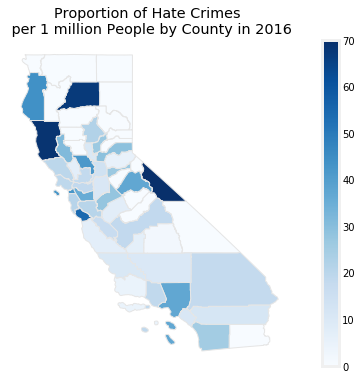

In [141]:
fig, ax = plt.subplots(1, figsize=(10,6))
map_data.plot(column='Prop_2016', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title('Proportion of Hate Crimes \n per 1 million People by County in 2016')
ax.axis('off')

In [143]:
voter_registration = pd.read_csv("~/Downloads/county.csv")
voter_registration.head()


,County,Eligible,Total Registered,Democratic,Republican,American Independent,Green,Libertarian,Peace and Freedom,Other,No Party Preference
0,Alameda,"1,069,959","888,664","510,429","107,482","16,864","7,259","4,652","2,636","6,432","232,910"
1,Percent,NaN,83.06%,57.44%,12.09%,1.90%,0.82%,0.52%,0.30%,0.72%,26.21%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alpine,951,722,276,223,25,8,5,2,3,180
4,Percent,NaN,75.92%,38.23%,30.89%,3.46%,1.11%,0.69%,0.28%,0.42%,24.93%


In [144]:
test = pd.DataFrame()

for i in range(len(voter_registration)):
    
    if i % 3 == 0:
        test = test.append(voter_registration.iloc[i,:])
        
test = test.iloc[:,[1, 2, 9, 10]].reset_index(drop=True)
test = test.iloc[0:58, :]

In [145]:
test.head()

,County,Democratic,Republican,Total Registered
0,Alameda,"510,429","107,482","888,664"
1,Alpine,276,223,722
2,Amador,"6,740","10,248","22,417"
3,Butte,"45,214","45,909","129,275"
4,Calaveras,"8,682","12,687","29,555"


In [146]:
for i in range(len(test)):
    test_dem = test.iloc[i, 1]
    test_rep = test.iloc[i, 2]
    test_total = test.iloc[i, 3]
    test.iloc[i, 1] = int(test_dem.replace(',', ''))
    test.iloc[i, 2] = int(test_rep.replace(',', ''))
    test.iloc[i, 3] = int(test_total.replace(',', ''))

test.head()

test['Prop_Dem'] = test['Democratic']/test['Total Registered'] * 100
test['Prop_Rep'] = test['Republican']/test['Total Registered'] * 100
test.head()

,County,Democratic,Republican,Total Registered,Prop_Dem,Prop_Rep
0,Alameda,510429,107482,888664,57.4378,12.0948
1,Alpine,276,223,722,38.2271,30.8864
2,Amador,6740,10248,22417,30.0665,45.7153
3,Butte,45214,45909,129275,34.9751,35.5127
4,Calaveras,8682,12687,29555,29.3757,42.9267


In [147]:
map_data = pd.merge(map_data, test, how='inner', left_on = 'NAME', right_on = 'County')
map_data.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,County_x,LSAD,CLASSFP,MTFCC,CSAFP,...,2016,County_Number,Count,Prop_2016,County_y,Democratic,Republican,Total Registered,Prop_Dem,Prop_Rep
0,06,001,01675839,06001,Alameda,Alameda County,06,H1,G4020,488,...,1650950,1,59,35.737000,Alameda,510429,107482,888664,57.4378,12.0948
1,06,003,01675840,06003,Alpine,Alpine County,06,H1,G4020,None,...,1047,2,0,0.000000,Alpine,276,223,722,38.2271,30.8864
2,06,005,01675841,06005,Amador,Amador County,06,H1,G4020,None,...,37429,3,1,26.717251,Amador,6740,10248,22417,30.0665,45.7153
3,06,007,01675842,06007,Butte,Butte County,06,H1,G4020,None,...,226231,4,5,22.101304,Butte,45214,45909,129275,34.9751,35.5127
4,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,...,45322,5,0,0.000000,Calaveras,8682,12687,29555,29.3757,42.9267


In [149]:
map_data['Prop_Dem'] = map_data['Prop_Dem'].astype('float')
map_data['Prop_Rep'] = map_data['Prop_Rep'].astype('float')
map_data.dtypes

STATEFP               object
COUNTYFP              object
COUNTYNS              object
GEOID                 object
NAME                  object
County_x              object
LSAD                  object
CLASSFP               object
MTFCC                 object
CSAFP                 object
CBSAFP                object
METDIVFP              object
FUNCSTAT              object
ALAND                  int64
AWATER                 int64
INTPTLAT              object
INTPTLON              object
geometry            geometry
2016                   int64
County_Number          int64
Count                  int64
Prop_2016            float64
County_y              object
Democratic            object
Republican            object
Total Registered      object
Prop_Dem             float64
Prop_Rep             float64
dtype: object

(-13914886.987877833,
 -12647417.311524622,
 3766456.955722065,
 5228877.504468495)

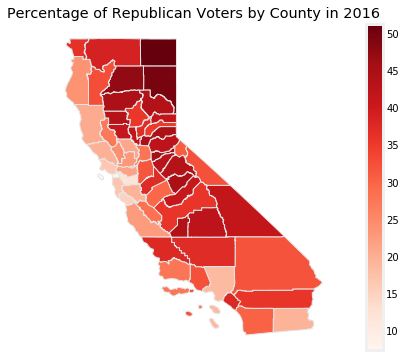

In [151]:
fig, ax = plt.subplots(1, figsize=(10,6))
map_data.plot(column='Prop_Rep', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title('Percentage of Republican Voters by County in 2016')
ax.axis('off')

In [154]:
stats.spearmanr(map_data['Prop_2016'], map_data['Prop_Rep'])

SpearmanrResult(correlation=-0.4616740003201373, pvalue=0.00026445105286260825)

In [156]:
print(stats.spearmanr(map_data['2016'], map_data['Prop_Rep']))
print(stats.spearmanr(map_data['2016'], map_data['Prop_2016']))

SpearmanrResult(correlation=-0.5003229874803901, pvalue=6.353104648571309e-05)
SpearmanrResult(correlation=0.45525623636400336, pvalue=0.0003298002162404547)


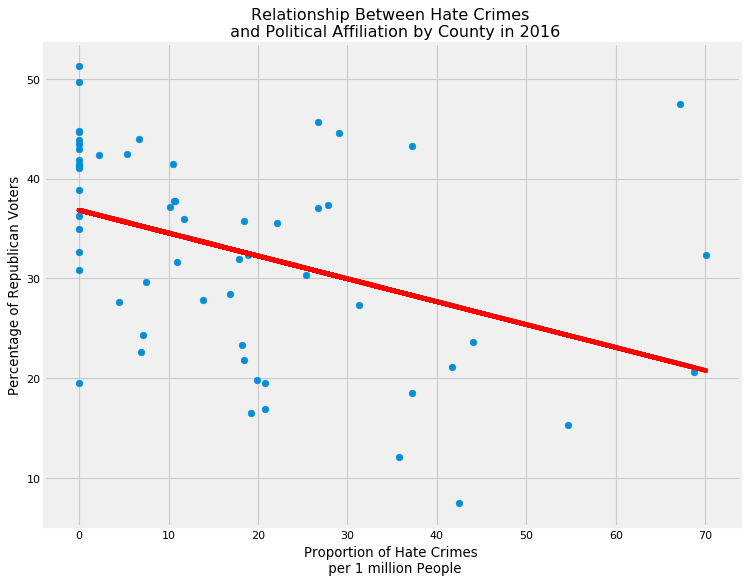

In [164]:
figure(figsize=(10, 8), dpi=80)
m, b = np.polyfit(map_data['Prop_2016'], map_data['Prop_Rep'], 1)
plt.plot(map_data['Prop_2016'], m*map_data['Prop_2016']+b, color='red')
plt.scatter(map_data['Prop_2016'], map_data['Prop_Rep'], alpha=1)
plt.title('Relationship Between Hate Crimes \n and Political Affiliation by County in 2016')
plt.xlabel('Proportion of Hate Crimes \n per 1 million People')
plt.ylabel('Percentage of Republican Voters')
plt.show()

In [24]:
hate_tweets_binary = pd.read_csv("ethos_data/Ethos_Dataset_Multi_Label.csv", sep='\t')
hate_tweets_binary.head()

,"comment;violence;directed_vs_generalized;gender;race;national_origin;disability;religion;sexual_orientation,,,,,,,,,,"
0,You should know women's sports are a joke;0;0;...
1,You look like Sloth with deeper Down’s syndrom...
2,You look like Russian and speak like Indian. B...
3,"Women deserve to be abused, I guess.;0.6666666..."
4,Women are made for making babies and cooking d...


In [27]:
comment = []
violence = []
directed_vs_generalized = []
gender = []
race = []
national_origin = []
disability = []
religion = []
sexual_orientation = []

for i in range(len(hate_tweets_binary)):
    row = hate_tweets_binary.iloc[i,0].split(sep=";")
    comment.append(row[0])
    violence.append(float(row[1]))
    directed_vs_generalized.append(float(row[2]))
    gender.append(float(row[3]))
    race.append(float(row[4]))
    national_origin.append(float(row[5]))
    disability.append(float(row[6]))
    religion.append(float(row[7]))
    #sexual_orientation.append(float(row[8]))



In [28]:
d = {'Comment':comment, 'Violence':violence, 'Directed_vs_Generalized':directed_vs_generalized,
    'Gender':gender, 'Race':race, 'National_Origin':national_origin, 'Disability':disability,
    'Religion':religion}
hate_social = pd.DataFrame(d)
hate_social.head()

,Comment,Violence,Directed_vs_Generalized,Gender,Race,National_Origin,Disability,Religion
0,You should know women's sports are a joke,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0
1,You look like Sloth with deeper Down’s syndrome,0.000000,0.833333,0.000000,0.000000,0.000000,1.0,0.0
2,You look like Russian and speak like Indian. B...,1.000000,0.500000,0.142857,0.142857,0.714286,0.0,0.0
3,"Women deserve to be abused, I guess.",0.666667,0.166667,1.000000,0.000000,0.000000,0.0,0.0
4,Women are made for making babies and cooking d...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0


In [29]:
hate_social.dtypes


Comment                     object
Violence                   float64
Directed_vs_Generalized    float64
Gender                     float64
Race                       float64
National_Origin            float64
Disability                 float64
Religion                   float64
dtype: object

In [33]:
for i in [3, 4, 7]:
    print(sum(hate_social.iloc[:,i]))
    

96.00230439800005
76.46706946000002
73.715159807


In [34]:
96+76.47+73.72



246.19

In [35]:
print(96/246.19)
print(76.47/246.19)
print(73.72/246.19)

0.3899427271619481
0.31061375360493926
0.29944351923311263


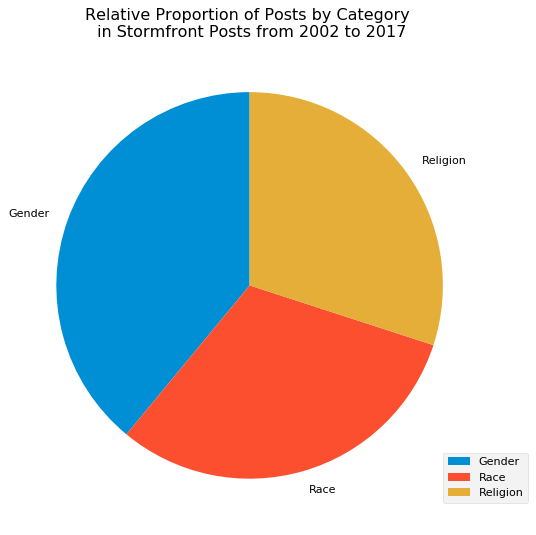

In [37]:
figure(figsize=(10, 8), dpi=80)
plt.pie([0.39, 0.31, 0.3], labels=['Gender', 'Race', 'Religion'], startangle=90)
plt.legend(bbox_to_anchor=(0.75,0.25), loc="upper left",
          bbox_transform=plt.gcf().transFigure)
plt.title('Relative Proportion of Posts by Category \n in Stormfront Posts from 2002 to 2017')
plt.show()